In [1]:
import os
import os.path as p

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import play_wave

%matplotlib inline

# Plan

1. Load files
2. convert the signal with:
    * FFT
    * Filter bank
    * MEL
    
3. Plot spectograms per instrument and inspect are there any differencies (try with alpha different level)

In [63]:
file_name = audio_data.fname.sample(1).values[0]

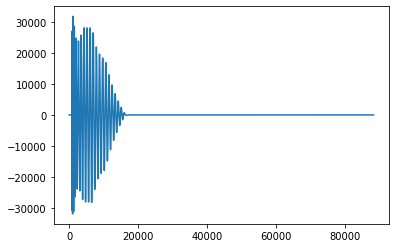

In [69]:
from scipy.io import wavfile

sample_rate, signal = wavfile.read(p.join(data_dir, file_name))

plt.plot(signal)
plt.show()

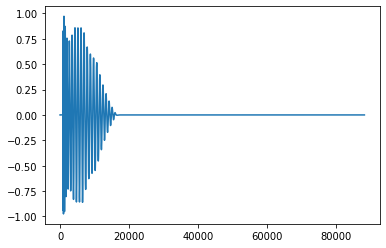

In [73]:
signal, sample_rate = librosa.load(p.join(data_dir, file_name), sr=None)

plt.plot(signal)
plt.show()

In [53]:
audio_data = pd.read_csv('instruments.csv')

data_dir = r'../../data/freesound-audio-tagging/audio_train'

# Plot the spectogram of a random recording per instrument

In [35]:
def calculate_fft(signal, sample_rate):
    signal_size = len(signal)
    frequency = np.fft.rfftfreq(signal_size, 1./sample_rate)
    return frequency

def plot_signal_features(instrument, signal, rate):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    
    ax[0].plot(signal)
    
    plt.suptitle(f'{instrument.lower()}')
    plt.show()

In [37]:
for instrument in np.unique(audio_data.label):
    audio_file = audio_data[audio_data.label == instrument].sample(1).fname.values[0]
    signal, rate = librosa.load(p.join(data_dir, audio_file), sr=None)
    
    print(calculate_fft(signal, rate))
#     plot_signal_features(instrument, signal, rate)

[0.00000000e+00 3.79939210e-02 7.59878419e-02 ... 2.20499240e+04
 2.20499620e+04 2.20500000e+04]
[0.00000000e+00 7.46268657e-01 1.49253731e+00 ... 2.20485075e+04
 2.20492537e+04 2.20500000e+04]
[0.00000000e+00 2.12765957e-01 4.25531915e-01 ... 2.20495745e+04
 2.20497872e+04 2.20500000e+04]
[0.00000000e+00 1.71232877e-01 3.42465753e-01 ... 2.20496575e+04
 2.20498288e+04 2.20500000e+04]
[0.00000000e+00 3.47222222e-01 6.94444444e-01 ... 2.20493056e+04
 2.20496528e+04 2.20500000e+04]
[0.00000000e+00 1.17647059e-01 2.35294118e-01 ... 2.20497647e+04
 2.20498824e+04 2.20500000e+04]
[0.00000000e+00 3.18471338e-01 6.36942675e-01 ... 2.20493631e+04
 2.20496815e+04 2.20500000e+04]
[0.00000000e+00 1.02249489e-01 2.04498978e-01 ... 2.20497955e+04
 2.20498978e+04 2.20500000e+04]
[0.00000000e+00 5.95238095e-01 1.19047619e+00 ... 2.20488095e+04
 2.20494048e+04 2.20500000e+04]
[0.00000000e+00 6.66666667e-01 1.33333333e+00 ... 2.20486667e+04
 2.20493333e+04 2.20500000e+04]


In [42]:
signal.shape

(66150,)

In [48]:
signal_size = len(signal)
frequency = np.fft.rfftfreq(signal_size, 1./rate)
Y = np.abs(np.fft.rfft(signal) / signal_size)

frequency.shape

(33076,)

In [49]:
Y.shape

(33076,)

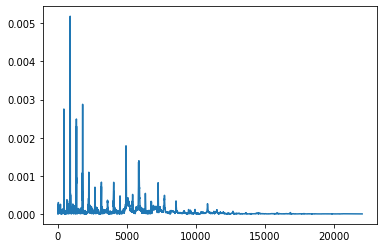

In [50]:
plt.plot(frequency, Y)